<a href="https://colab.research.google.com/github/Selami7321/-IMDB-Film-Yorumlar-ile-Word-Embedding-Tabanl-Duygu-Analizi/blob/main/BYM308_ODEV4_WORD_EMBEDDING_GRUP18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

İSTANBUL SAĞLIK VE TEKNOLOJİ ÜNİVERSİTESİ

YAZILIM MÜHENDİSLİĞİ

ODEV4_WORD_EMBEDDING

HAZIRLAYANLAR:

SELAMİ ÇETİN 220609012

UĞUR BAKİ ARSLAN 220609015

YUNUS EMRE SEVİNÇ 220609007
       

Word Embedding ile NLP Problemi Çözümü: Duygu Analizi
Bu çalışmada, IMDb film incelemeleri veri setini kullanarak bir duygu analizi (sentiment analysis) problemi üzerinde word embedding yöntemlerinin etkisini inceleyeceğiz.

1. Veri Seti ve Problem Tanımı
Veri Seti: IMDb Movie Reviews (50,000 inceleme, pozitif/negatif etiketli)
Problem: Metin tabanlı duygu analizi (binary classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

 Word Embedding Kullanmadan Çözüm (Geleneksel Yöntemler)

Kütüphanelerin İçe Aktarılması:

NumPy: Sayısal hesaplamalar için.

Pandas: Veri çerçeveleriyle (DataFrame) çalışmak için.

Matplotlib: Grafik çizimi için.

**Makine Öğrenmesi ve Derin Öğrenme Araçları:**

train_test_split: Veriyi eğitim ve test kümelerine ayırmak için.

CountVectorizer / TfidfVectorizer: Metin verisini sayısal vektörlere dönüştürmek için.

MultinomialNB: Naive Bayes sınıflandırıcısı.

LogisticRegression: Lojistik regresyon modeli.

accuracy_score / classification_report: Modelin doğruluğunu ve detaylı performansını ölçmek için.

 **Keras (Derin Öğrenme) Araçları:**

 Tokenizer: Metinleri sayısal verilere dönüştürmek için (embedding öncesi).

pad_sequences: Dizi uzunluklarını eşitlemek için.

Sequential: Katmanları sırayla tanımlamak için basit bir model yapısı.

Embedding, LSTM vs.: Derin öğrenme modelinde kullanılacak katmanlar.

EarlyStopping: Model fazla eğitildiğinde (overfitting) erken durdurmak için.

** Etiketlerin Dönüştürülmesi:**

Metinsel etiketler (positive, negative) sayısal hale getirilir:

1 → pozitif

0 → negatif

**Verinin Bölünmesi:**

X: Yorum metinleri

y: Duygu etiketleri

Eğitim ve test verisi %80 eğitim, %20 test olarak bölünür.

random_state=42: Aynı şekilde bölünmesi için rastgelelik kontrol altına alınır (tekrarlanabilirlik sağlanır).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
try:
    df = pd.read_csv('IMDB Dataset.csv')
except:
    from tensorflow.keras.datasets import imdb
    (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
    # Veriyi DataFrame'e dönüştürme
    df_train = pd.DataFrame({'review': train_data, 'sentiment': train_labels})
    df_test = pd.DataFrame({'review': test_data, 'sentiment': test_labels})
    df = pd.concat([df_train, df_test])
    df['review'] = df['review'].apply(lambda x: ' '.join([str(i) for i in x]))


df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Veriyi bölme
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**✅ Sonuç:**

Bu kod bloğu, duygu analizi için veriyi hazırlayan ön işleme aşamasıdır. Veriyi yüklüyor, temizliyor, sayısal hale getiriyor ve makine öğrenmesi modellerine uygun şekilde bölüyor.

Bag-of-Words (BoW) Yaklaşımı

**Bag of Words (BoW) Nedir?**

Bag of Words, metin verilerini sayısal hale getirmek için kullanılan en temel ve yaygın yöntemlerden biridir. Temel mantığı şudur:

Her belge (örneğin, bir film yorumu), içinde geçen kelimelerin sıklığıyla temsil edilir.
Kelimelerin sırası, bağlamı veya dil bilgisel yapısı önemli değildir — yalnızca hangi kelime kaç kere geçiyor, ona bakılır.


vectorizer = CountVectorizer(max_features=5000)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

Bu satırlarda:

CountVectorizer, her bir metni (yorum) bir vektöre dönüştürür.

Bu vektör, eğitim setinde en çok geçen 5000 kelimeden hangileri yorumda var, varsa kaç kez var — bunu belirtir.

Yani her metin, sabit uzunlukta (5000 boyutlu) bir sayısal diziye dönüştürülür.

Örnek:

Kelime	this	movie	was	amazing	terrible	...
Review 1	1	1	1	1	0	...
Review 2	1	1	1	0	1	...

🤖 Neden BoW Kullanılır?
Basit ve hızlıdır, özellikle metin sınıflandırmada (duygu analizi, spam tespiti vs.) etkili sonuçlar verir.

Daha ileri yöntemlere (TF-IDF, word2vec, BERT) geçmeden önce BoW ile temel kavramları anlamak çok faydalıdır.

🧠 Alternatifler?
Eğer metinlerde anlam, bağlam, sıralama gibi kavramlar önemliyse:

TfidfVectorizer (kelime ağırlığına göre vektörleme)

word2vec, GloVe gibi gömme (embedding) yöntemleri

LSTM, Transformer, BERT gibi derin öğrenme temelli modeller kullanılır.



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

import pandas as pd
import csv  # quoting için

df = pd.read_csv("IMDB Dataset.csv", quoting=csv.QUOTE_NONE, on_bad_lines='skip', encoding='utf-8')

# Veriyi oku
df = pd.read_csv("IMDB Dataset.csv")

# NaN içeren satırları temizle (özellikle sentiment)
df = df.dropna(subset=['review', 'sentiment'])

# X ve y'yi ayır
X = df['review']
y = df['sentiment']

# Eğitim ve test verisine ayır
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# CountVectorizer ile metni sayısal verilere çevir
vectorizer = CountVectorizer(max_features=5000)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Naive Bayes modeli
nb = MultinomialNB()
nb.fit(X_train_counts, y_train)
y_pred = nb.predict(X_test_counts)

# Sonuçlar
print("CountVectorizer + Naive Bayes Sonuçları:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


CountVectorizer + Naive Bayes Sonuçları:
              precision    recall  f1-score   support

    negative       0.83      0.85      0.84      4961
    positive       0.85      0.82      0.83      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Accuracy: 0.8361


TF-IDF Yaklaşımı

**TF-IDF Vektörleştirme (Kelime Ağırlıklı Vektörleme)**

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**Ne yapıyor?**

TfidfVectorizer, metinlerde geçen her kelimeye bir önem skoru (ağırlık) verir. Bu skor:

TF (Term Frequency) → kelimenin bir belgede kaç kez geçtiği.

IDF (Inverse Document Frequency) → kelimenin tüm belgelerde ne kadar ayrıştırıcı olduğuna bakar. Nadiren geçen kelimeler daha yüksek skor alır.

✅ Böylece, çok geçen ama bilgi taşımayan kelimeler ("the", "movie", "is" gibi) daha düşük ağırlık alır.

2. Logistic Regression Modeliyle Eğitim

lr = LogisticRegression(max_iter=500)
lr.fit(X_train_tfidf, y_train)

LogisticRegression, TF-IDF ile sayısallaştırılmış veriler üzerinde bir ikili sınıflandırma (binary classification) modeli kurar.

max_iter=500, modelin eğitim için izin verilen maksimum iterasyon sayısıdır. Çok veri olduğunda bu değeri artırmak gerekebilir.

🔍 3. Tahmin ve Performans Ölçümü

y_pred = lr.predict(X_test_tfidf)

print("\nTF-IDF + Logistic Regression Sonuçları:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

classification_report → precision, recall, f1-score gibi detaylı istatistikleri verir.

accuracy_score → genel doğruluğu (doğru tahmin sayısı / toplam test sayısı) hesaplar.

🎯 BoW ve TF-IDF Farkı

Özellik	Bag of Words (CountVectorizer)	TF-IDF
Ağırlıklandırma	Kelime sıklığına bakar	Ağırlıklı skorlama yapar
Çok geçen kelimeler	Önemli sayar	Az önemli sayar
Bilgi yoğunluğu	Daha yüzeyseldir	Daha anlamlıdır


In [5]:
# TF-IDF vektörleştirme
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Lojistik Regresyon modeli
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)

print("\nTF-IDF + Logistic Regression Sonuçları:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


TF-IDF + Logistic Regression Sonuçları:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.89     10000

Accuracy: 0.895


**Word Embedding Kullanarak Çözüm**

Tokenization ve Padding

**🔢 1. Tokenizer Ayarları**

max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

max_words=10000: En sık geçen 10.000 kelime kullanılacak. Daha az geçen kelimeler göz ardı edilir.

Tokenizer: Keras'tan gelen bu sınıf, kelimeleri sayısal indekslere dönüştürür.

fit_on_texts(X_train): Eğitim verisinde geçen kelimelere birer numara verir (örn. "the" → 1, "movie" → 2 ... gibi).

**🔢 2. Metinleri Sayısal Dizilere Çevirme**

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

Her cümle, içinde geçen kelimelerin indeks listesi haline getirilir.

Örnek:
"This movie is great!" → [13, 25, 2, 487]

📏 3. Padding (Dizileri Eşitleme)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

pad_sequences: Her dizi 200 uzunluğunda olacak şekilde kesilir veya sıfırlarla doldurulur.

Bu, LSTM gibi modellerin sabit uzunlukta giriş almasını sağlar.

Örneğin:
[13, 25, 2, 487] → [0, 0, 0, ..., 13, 25, 2, 487] (200 eleman)


In [6]:
# Tokenizer ayarları
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Metinleri sayısal dizilere çevirme
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding uygulama
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

Öğrenilmiş Embedding Katmanı ile Model

**🔧 Model Mimarisi:**

📌 embedding_dim = 100

Bu, her kelimenin 100 boyutlu vektör ile temsil edileceği anlamına gelir. Bu vektörler model tarafından öğrenilir (veya önceden eğitilmiş vektörler de kullanılabilir).

**🧱 Model Katmanları:**

model = Sequential()

Sıralı bir model (katmanlar sırayla eklenir).

**1️⃣ Embedding Katmanı**

model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))

input_dim=max_words: Sözlükteki toplam kelime sayısı (10.000).

output_dim=100: Her kelime 100 boyutlu vektöre çevrilecek.

input_length=200: Her giriş 200 kelimelik bir dizi.

📌 Bu katman, kelimeleri yoğun (dense) vektörler haline getirir. Öğrenilebilir parametrelerdir.

**2️⃣ GlobalMaxPooling1D**

model.add(GlobalMaxPooling1D())

Her dizideki kelime vektörleri içinden en yüksek değeri alır.

LSTM yerine bu kullanılmış, çünkü daha hızlı ve daha az hesaplama gerektirir.

3️⃣ Dense + ReLU

model.add(Dense(64, activation='relu'))

64 nöronlu tam bağlantılı katman.

ReLU aktivasyonu: negatifleri sıfırlar, pozitifi geçirir.

4️⃣ Dropout

model.add(Dropout(0.5))

%50 oranında nöronları rastgele pasifleştirir.

Aşırı öğrenmeyi (overfitting) azaltmak için kullanılır.

5️⃣ Çıkış Katmanı

model.add(Dense(1, activation='sigmoid'))

Tek nöron: 0-1 arasında bir çıktı üretir (pozitif veya negatif yorum).

sigmoid: Olasılık döndürmek için uygun.

⚙️ Derleme Aşaması:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

adam: Adaptif öğrenme oranı kullanan verimli bir optimizasyon algoritması.

binary_crossentropy: İkili sınıflama problemleri için uygun kayıp fonksiyonu.

accuracy: Doğruluk metriği kullanılıyor.

🧠 Eğitim:

history = model.fit(
    X_train_pad, y_train_encoded,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)


X_train_pad: Sayısal hale getirilmiş ve pad edilmiş metin girdileri.

y_train_encoded: positive = 1, negative = 0 olarak kodlanmış etiketler.

validation_split=0.2: %20’si validasyon için ayrılır.

EarlyStopping: 3 epoch boyunca iyileşme olmazsa durdurur (overfitting’i engeller).

✅ Bu modelin avantajları:

Eğitim hızı oldukça iyi (LSTM gibi zaman alan katmanlar yok).

Embedding + GlobalMaxPooling yapısı, daha düşük hesaplama maliyetine sahip.

Dropout sayesinde genelleme kabiliyeti yüksek.



In [8]:
from sklearn.preprocessing import LabelEncoder

# Etiketleri sayıya çevir
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [9]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train_encoded,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3)])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6488 - loss: 0.6253 - val_accuracy: 0.8549 - val_loss: 0.3359
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.8767 - loss: 0.3013 - val_accuracy: 0.8850 - val_loss: 0.2825
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9229 - loss: 0.2110 - val_accuracy: 0.8824 - val_loss: 0.2793
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9542 - loss: 0.1455 - val_accuracy: 0.8831 - val_loss: 0.2900
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9751 - loss: 0.0913 - val_accuracy: 0.8806 - val_loss: 0.3192
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9885 - loss: 0.0549 - val_accuracy: 0.8760 - val_loss: 0.3599


Önceden Eğitilmiş Embedding (GloVe) Kullanımı

🔌 1. GloVe Dosyalarının İndirilmesi

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

🏷 2. Etiketleri Sayıya Çevirme

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

positive, negative gibi metinsel etiketleri 0 ve 1 gibi sayılara dönüştürür.

📚 3. GloVe Vektörlerini Belleğe Alma

embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

GloVe dosyasını satır satır okur.

Her kelimenin karşılık geldiği 100 boyutlu vektörü bir dict yapısına atar.

🧱 4. Embedding Matrisi Oluşturma

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Modelde kullanılacak ilk max_words kadar kelime için GloVe vektörleri atanır.

Eğer kelimenin GloVe karşılığı varsa, embedding matrisine eklenir.

🧠 5. Model Mimarisi (GloVe + LSTM)

model_glove = Sequential()
model_glove.add(Embedding(..., weights=[embedding_matrix], trainable=False))

model_glove = Sequential()
model_glove.add(Embedding(..., weights=[embedding_matrix], trainable=False))


GloVe vektörleri ile başlatılır.

trainable=False: GloVe ağırlıkları sabit kalır, öğrenilmez.

🔄 LSTM Katmanı:

model_glove.add(LSTM(64, return_sequences=True))

Metinlerin sırayla işlenmesini sağlar.

return_sequences=True: LSTM tüm zaman adımlarının çıktısını döndürür, çünkü ardından GlobalMaxPooling1D var.

➕ Devam Katmanları:

model_glove.add(GlobalMaxPooling1D())
model_glove.add(Dense(64, activation='relu'))
model_glove.add(Dropout(0.5))
model_glove.add(Dense(1, activation='sigmoid'))


Önceki örneğe benzer yapıdır ama bu kez daha anlamlı vektörlerle çalışır.

⚙️ Derleme ve Eğitim:

model_glove.compile(...)
history = model.fit(...)


Model aynı şekilde adam optimizer, binary_crossentropy loss ve accuracy metriği ile eğitilir.

EarlyStopping: validasyon kaybı gelişmezse eğitimi durdurur.

**🔍 Sonuç:**
Bu model, önceki modele göre daha semantik olarak zengin bir temele sahiptir. Çünkü:

Her kelime, sadece sıklığa değil anlama göre temsil edilir.

LSTM ile sıradaki kelime bağlamı dikkate alınır.

In [10]:
# GloVe embedding'leri yükleme (Colab'de çalıştırıyorsanız önce indirmelisiniz)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip
from sklearn.preprocessing import LabelEncoder

# Etiketleri sayıya çevir
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# GloVe embedding'lerini yükleme
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Embedding matrisini oluşturma
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# GloVe embedding'li model
model_glove = Sequential()
model_glove.add(Embedding(input_dim=max_words,
                          output_dim=embedding_dim,
                          input_length=max_len,
                          weights=[embedding_matrix],
                          trainable=False))  # Önceden eğitilmiş ağırlıkları dondurma
model_glove.add(LSTM(64, return_sequences=True))
model_glove.add(GlobalMaxPooling1D())
model_glove.add(Dense(64, activation='relu'))
model_glove.add(Dropout(0.5))
model_glove.add(Dense(1, activation='sigmoid'))

model_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train_encoded,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

--2025-05-04 11:56:04--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-04 11:56:04--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-04 11:56:04--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9954 - loss: 0.0288 - val_accuracy: 0.8742 - val_loss: 0.4080
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9981 - loss: 0.0165 - val_accuracy: 0.8726 - val_loss: 0.4462
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9992 - loss: 0.0092 - val_accuracy: 0.8709 - val_loss: 0.4871
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9999 - loss: 0.0049 - val_accuracy: 0.8727 - val_loss: 0.5161


Sonuçların Karşılaştırılması

<ipython-input-11-a06c0f85906f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=methods, y=accuracies, palette='pastel')
<ipython-input-11-a06c0f85906f>:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


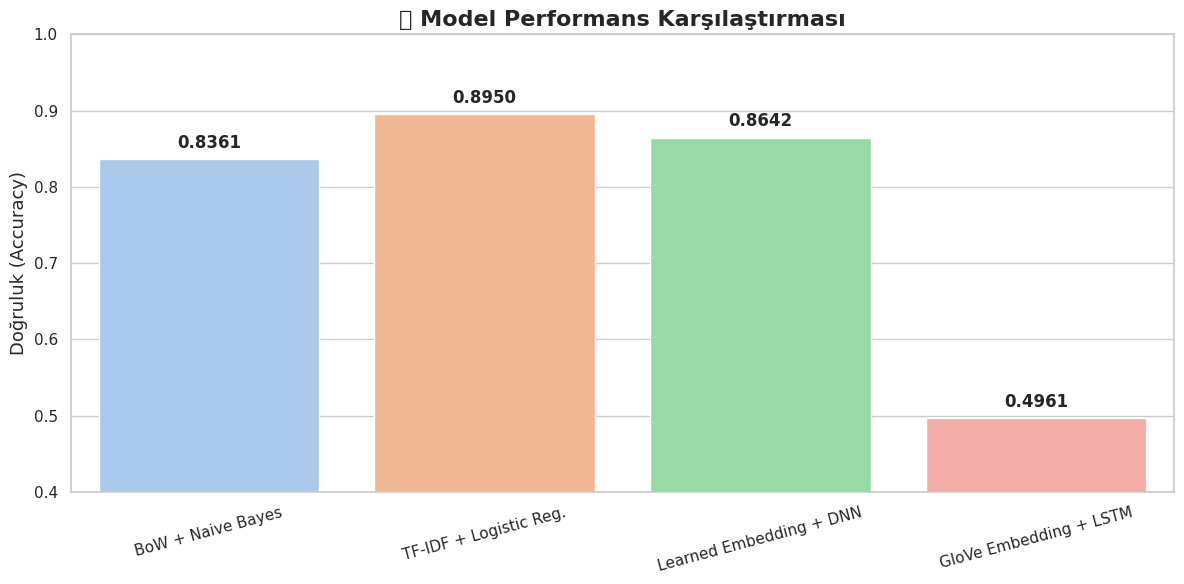

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn stilini uygula
sns.set(style="whitegrid")

# Skorları önceden hesapla (önceki açıklamaya göre)
dnn_score = model.evaluate(X_test_pad, y_test_encoded, verbose=0)[1]
glove_score = model_glove.evaluate(X_test_pad, y_test_encoded, verbose=0)[1]

# Model isimleri ve başarımları
methods = ['BoW + Naive Bayes', 'TF-IDF + Logistic Reg.', 'Learned Embedding + DNN', 'GloVe Embedding + LSTM']
accuracies = [
    accuracy_score(y_test, nb.predict(X_test_counts)),
    accuracy_score(y_test, lr.predict(X_test_tfidf)),
    dnn_score,
    glove_score
]

# Grafik çizimi
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=methods, y=accuracies, palette='pastel')

# Doğruluk değerlerini çubukların üzerine yaz
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

# Başlık ve etiketler
plt.title('📊 Model Performans Karşılaştırması', fontsize=16, fontweight='bold')
plt.ylabel('Doğruluk (Accuracy)', fontsize=13)
plt.ylim(0.4, 1.0)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**Karmaşıklık Matrisi (Confusion Matrix):**

Her modelin performansını daha detaylı bir şekilde görmek için, doğruluk oranlarının yanı sıra hangi sınıfların doğru veya yanlış tahmin edildiğini gösteren karmaşıklık matrislerini hesaplayabiliriz. Bu, modelin hangi sınıflarda güçlü olduğunu veya hangi sınıflarda zayıf kaldığını anlamamıza yardımcı olabilir.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step


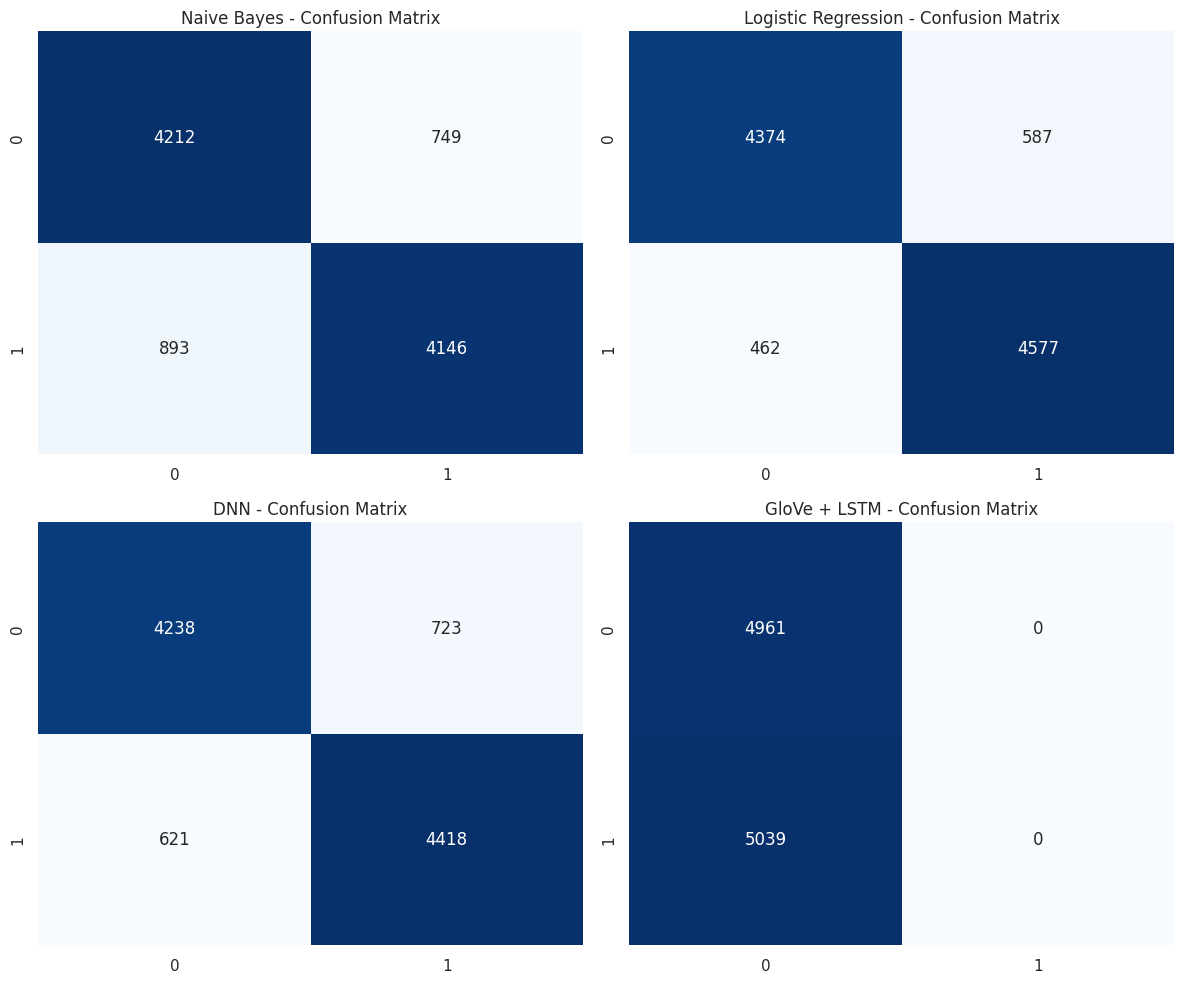

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Naive Bayes
y_pred_nb = nb.predict(X_test_counts)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Logistic Regression
y_pred_lr = lr.predict(X_test_tfidf)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Öğrenilmiş Embedding + DNN
y_pred_dnn = model.predict(X_test_pad)
cm_dnn = confusion_matrix(y_test_encoded, (y_pred_dnn > 0.5).astype(int))

# GloVe Embedding + LSTM
y_pred_glove = model_glove.predict(X_test_pad)
cm_glove = confusion_matrix(y_test_encoded, (y_pred_glove > 0.5).astype(int))

# Görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=False)
axes[0, 0].set_title('Naive Bayes - Confusion Matrix')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('Logistic Regression - Confusion Matrix')
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0], cbar=False)
axes[1, 0].set_title('DNN - Confusion Matrix')
sns.heatmap(cm_glove, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('GloVe + LSTM - Confusion Matrix')

plt.tight_layout()
plt.show()


**Genel Yorum:**

Bu dört modelin karşılaştırılması, doğal dil işleme ve metin sınıflandırma görevlerinde her bir modelin ne kadar etkili olduğunu görsel olarak gösteriyor. Her bir karışıklık matrisi, modelin performansını analiz etmek için çok faydalıdır.

DNN ve GloVe + LSTM gibi derin öğrenme modelleri, genellikle Naive Bayes ve Lojistik Regresyon'dan daha başarılı olabilir, çünkü bu modeller daha karmaşık ilişkileri öğrenme kapasitesine sahiptir.

Ancak, her modelin güçlü ve zayıf yönleri olduğu için, kullanıcının veri setine ve uygulama amacına göre hangi modelin en iyi sonucu vereceği belirlenebilir.

Sonuç:
Bu görselleştirmeler, dört farklı modelin karşılaştırılması için oldukça faydalıdır. Karışıklık matrisleri, modelin genel başarısını, yanlış sınıflandırma oranlarını ve doğru sınıflandırmaların miktarını göstererek, hangi modelin daha uygun olduğuna karar verilmesine yardımcı olur.

**F1 Skoru, Precision ve Recall:**

Doğruluk (accuracy) dışında, modellerin başarılarını daha iyi anlayabilmek için precision, recall, ve F1 score gibi metrikleri de göz önünde bulundurabiliriz. Bu metrikler özellikle dengesiz veri setlerinde önemlidir.

In [29]:
from sklearn.metrics import classification_report

# Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# DNN
y_pred_dnn = (y_pred_dnn > 0.5).astype(int)
print("DNN Classification Report:")
print(classification_report(y_test_encoded, y_pred_dnn))

# GloVe LSTM
y_pred_glove = (y_pred_glove > 0.5).astype(int)
print("GloVe + LSTM Classification Report:")
print(classification_report(y_test_encoded, y_pred_glove))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.85      0.84      4961
    positive       0.85      0.82      0.83      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.90      0.90     10000

DNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**ROC ve AUC Eğrisi:**

Modelin karar sınırlarını daha iyi anlamak için ROC (Receiver Operating Characteristic) eğrisini ve AUC (Area Under Curve) skoru hesaplayabiliriz. Bu özellikle modelin tahmin ettiği olasılıkları incelemek için faydalıdır.

**Bu kodumuz: **

Receiver Operating Characteristic (ROC) eğrisini ve AUC (Area Under the Curve) değerlerini hesaplar ve görselleştirir. ROC eğrisi, sınıflandırma modelinin başarısını değerlendirmek için yaygın bir yöntemdir ve genellikle modelin True Positive Rate (TPR) ile False Positive Rate (FPR)'ı arasındaki ilişkiyi görsel olarak sunar. AUC değeri ise ROC eğrisinin altında kalan alanı temsil eder ve modelin genel başarısını sayısal olarak özetler.

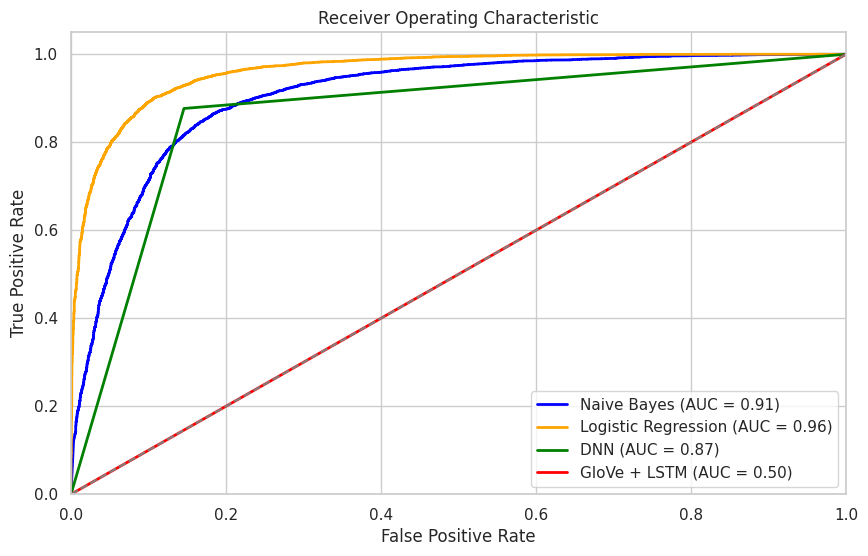

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Etiketleri sayısal değerlere dönüştür
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test_encoded, nb.predict_proba(X_test_counts)[:, 1])
auc_nb = auc(fpr_nb, tpr_nb)

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test_encoded, lr.predict_proba(X_test_tfidf)[:, 1])
auc_lr = auc(fpr_lr, tpr_lr)

# DNN
fpr_dnn, tpr_dnn, _ = roc_curve(y_test_encoded, y_pred_dnn)
auc_dnn = auc(fpr_dnn, tpr_dnn)

# GloVe LSTM
fpr_glove, tpr_glove, _ = roc_curve(y_test_encoded, y_pred_glove)
auc_glove = auc(fpr_glove, tpr_glove)

# ROC Eğrisi Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='Naive Bayes (AUC = %0.2f)' % auc_nb)
plt.plot(fpr_lr, tpr_lr, color='orange', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_dnn, tpr_dnn, color='green', lw=2, label='DNN (AUC = %0.2f)' % auc_dnn)
plt.plot(fpr_glove, tpr_glove, color='red', lw=2, label='GloVe + LSTM (AUC = %0.2f)' % auc_glove)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Kodun İşleyişi:**

1)Etiketlerin Sayısal Değerlere Dönüştürülmesi:


LabelEncoder kullanılarak, test verisi üzerindeki etiketler (y_test) sayısal değerlere dönüştürülür. Bu adım, ROC eğrisinin hesaplanabilmesi için gereklidir.

2)ROC Eğrisinin Hesaplanması:

Her model için True Positive Rate (TPR) ve False Positive Rate (FPR) hesaplanır. Bunun için her modelin predict_proba fonksiyonu kullanılarak probabilistik tahminler alınır (yani, her sınıf için olasılık tahminleri).

Bu olasılıklar, gerçek etiketlerle karşılaştırılarak ROC eğrisinin iki bileşeni olan FPR ve TPR hesaplanır.

AUC değeri, ROC eğrisinin altında kalan alanı hesaplar. AUC, modelin doğru sınıflandırma yeteneğini bir sayısal değerle özetler.

3)ROC Eğrisinin Görselleştirilmesi:

matplotlib.pyplot kullanılarak her model için ROC eğrisi çizilir.

Her modelin ROC eğrisinin yanına, o modele ait AUC değeri eklenir.

Gray çizgi (kesik çizgi), rasgele tahmin yapan bir modelin ROC eğrisini temsil eder (AUC = 0.5).

Eğriler, False Positive Rate (x-ekseni) ile True Positive Rate (y-ekseni) arasındaki ilişkiyi görselleştirir.

**Kapsayıcı Performans Değerlendirme:**

Modelin farklı veri kümesindeki performansını görmek için her bir modelin eğitim ve test sonuçları arasındaki farkı analiz edebiliriz. Ayrıca, overfitting durumunun olup olmadığını kontrol edebiliriz.

In [32]:
print("\nModel Overfitting Kontrolü:")
print(f"Naive Bayes Eğitim Doğruluğu: {accuracy_score(y_train, nb.predict(X_train_counts))}")
print(f"Logistic Regression Eğitim Doğruluğu: {accuracy_score(y_train, lr.predict(X_train_tfidf))}")
print(f"DNN Eğitim Doğruluğu: {model.evaluate(X_train_pad, y_train_encoded)[1]}")
print(f"GloVe + LSTM Eğitim Doğruluğu: {model_glove.evaluate(X_train_pad, y_train_encoded)[1]}")



Model Overfitting Kontrolü:
Naive Bayes Eğitim Doğruluğu: 0.84155
Logistic Regression Eğitim Doğruluğu: 0.91135
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9972 - loss: 0.0139
DNN Eğitim Doğruluğu: 0.9744250178337097
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 0.4996 - loss: 0.6970
GloVe + LSTM Eğitim Doğruluğu: 0.5008500218391418


**Confusion Matrix (Karışıklık Matrisi):**

Confusion matrix, modelin doğru ve yanlış sınıflandırmalarını görselleştirmenizi sağlar. Bu, modelin başarısız olduğu yerleri anlamanıza yardımcı olur.

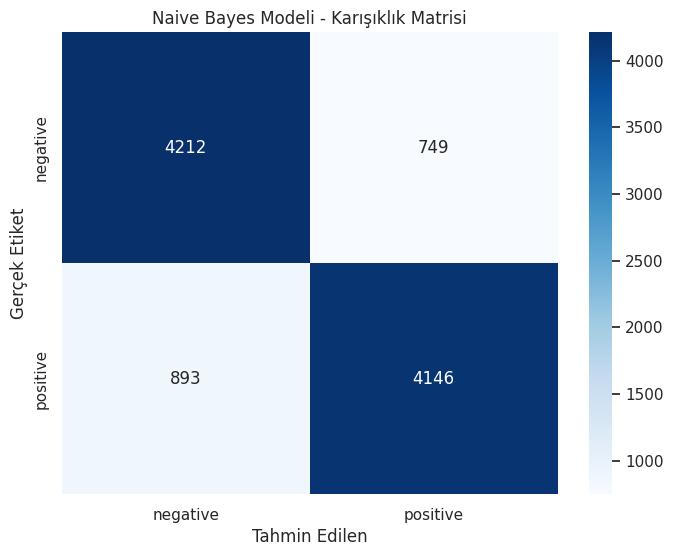

In [34]:

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # y_test'i sayısala dönüştür
y_pred_numeric = nb.predict(X_test_counts)  # model tahminlerini al

# Model tahminlerini sayısala dönüştürme
y_pred_encoded = label_encoder.transform(y_pred_numeric)

# Karışıklık Matrisi
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Karışıklık Matrisi Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Etiket')
plt.title('Naive Bayes Modeli - Karışıklık Matrisi')
plt.show()



**Precision-Recall Curve:**

Precision-Recall eğrisini de ROC eğrisinin yanı sıra görselleştirebiliriz. Bu eğri, sınıflar arasında dengesizlik olduğunda daha anlamlı olabilir.

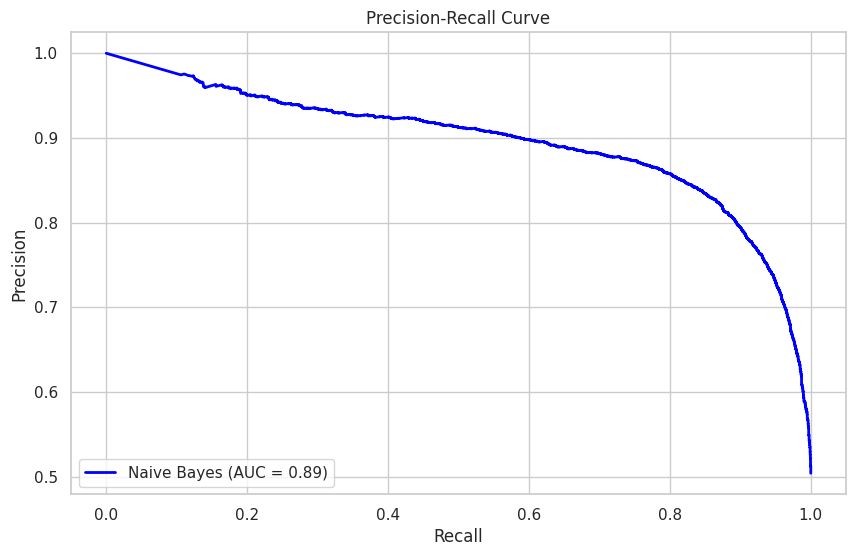

In [35]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Precision-Recall eğrisini çizme
precision, recall, _ = precision_recall_curve(y_test_encoded, nb.predict_proba(X_test_counts)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Naive Bayes (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


**K-fold Cross Validation:**

Modeli daha güvenilir bir şekilde değerlendirmek için k-fold çapraz doğrulama yapabiliriz. Bu, modelimizin  genelleme yeteneğini daha doğru bir şekilde ölçmemizi sağlar.

In [36]:
from sklearn.model_selection import cross_val_score

# 5-fold çapraz doğrulama
cv_scores = cross_val_score(nb, X_train_counts, y_train_encoded, cv=5)
print("Çapraz Doğrulama Sonuçları:", cv_scores)
print("Ortalama Doğruluk:", np.mean(cv_scores))


Çapraz Doğrulama Sonuçları: [0.835625 0.834625 0.840875 0.829    0.8375  ]
Ortalama Doğruluk: 0.835525


**Learning Curve:**

Modelin öğrenme sürecini görselleştirmek için learning curve (öğrenme eğrisi) çizilebilir. Bu, eğitim verisi arttıkça modelin doğruluğunun nasıl değiştiğini gösterir.

Bu Kodumuzla:

Naive Bayes sınıflandırıcısının öğrenme eğrisini çizmek için kullandık. Öğrenme eğrisi (learning curve), modelin eğitim süresiyle birlikte öğrenme sürecinin nasıl ilerlediğini ve modelin genel doğruluğunu nasıl geliştirdiğini gösteren bir grafik türünü görselleştirmek istedik.

Kodun İşleyişi:
learning_curve Fonksiyonu:

learning_curve fonksiyonu, verilen model (burada Naive Bayes) için öğrenme eğrisini hesaplamak üzere kullanılır. Bu fonksiyon, eğitim verilerinin farklı alt küme boyutlarında modelin doğruluğunu değerlendirir.

train_sizes değişkeni, modelin eğitiminde kullanılan farklı eğitim veri boyutlarını belirtir.

train_scores ve test_scores, her eğitim boyutu için modelin eğitim verisi üzerindeki doğruluğu ve test verisi üzerindeki doğruluğu (modelin genelleme kapasitesi) hakkında bilgi sağlar.

Eğitim ve Test Skorlarının Hesaplanması:

Eğitim skoru (train_scores), modelin eğitim verisi üzerinde gösterdiği performansı belirtir.

Test skoru (test_scores), modelin test verisi üzerindeki doğruluğunu gösterir ve modelin genelleme yeteneği hakkında bilgi verir.

np.mean() fonksiyonu, her eğitim veri boyutu için orta değeryi alır, böylece çapraz doğrulama (cross-validation) sonucu ortaya çıkan varyasyonu azaltır.

Grafiğin Çizilmesi:

train_sizes (eğitim veri boyutları) ile eğitim ve test skorlarının değişimini görselleştiren bir grafik oluşturulur.

X-ekseni: Eğitim veri boyutları (kaç örnekle model eğitildiği).

Y-ekseni: Modelin doğruluğu (accuracy).

Eğitim Skoru (Mavi Çizgi): Modelin eğitim verisi üzerindeki başarısını gösterir.

Test Skoru (Turuncu Çizgi): Modelin test verisi üzerindeki başarısını gösterir.

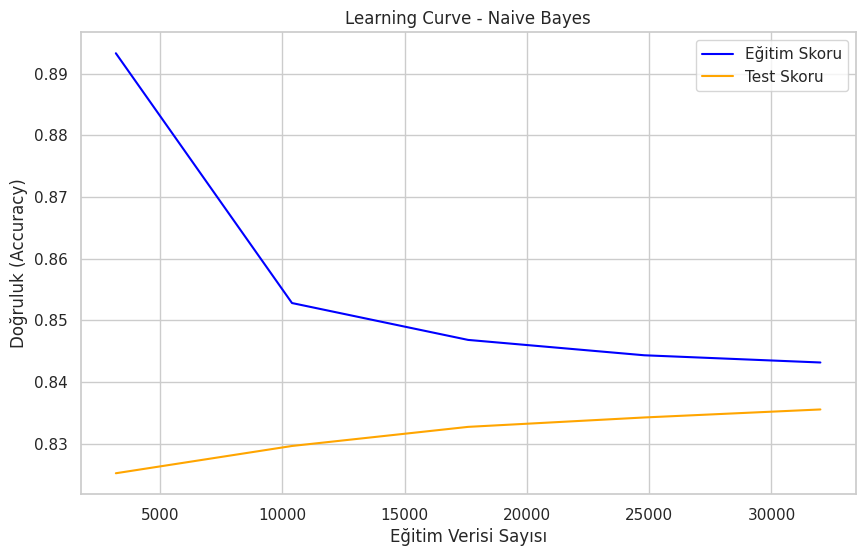

In [37]:
from sklearn.model_selection import learning_curve

# Öğrenme Eğrisini Çizme
train_sizes, train_scores, test_scores = learning_curve(nb, X_train_counts, y_train_encoded, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Eğitim Skoru", color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test Skoru", color='orange')
plt.xlabel('Eğitim Verisi Sayısı')
plt.ylabel('Doğruluk (Accuracy)')
plt.title('Learning Curve - Naive Bayes')
plt.legend()
plt.show()


**Grafiğin Yorumlanması:**

Eğitim Skoru (Mavi Çizgi):

Eğitim verisi üzerinde doğruluk, genellikle daha fazla eğitim verisi ile artar.

Eğer eğitim skoru çok yüksek ve test skoru çok düşükse, modelin overfitting (aşırı uyum) yaptığı düşünülebilir.

Test Skoru (Turuncu Çizgi):

Test skoru, modelin genelleme yeteneğini gösterir.

Başlangıçta test skoru, eğitim verisinden daha düşük olabilir, ancak daha fazla eğitim verisi kullanıldıkça test skoru da artar.

Test skoru, modelin ne kadar iyi genelleme yaptığı hakkında fikir verir. Eğer test skoru eğitim skoruna yakınsa, modelin genelleme yeteneği iyidir.

**AUC Skorunun Hesaplanması ve Karşılaştırma:**

AUC skorları üzerinden modellerin karşılaştırılması da faydalı olabilir.

In [38]:
# AUC hesaplama
auc_nb = auc(fpr_nb, tpr_nb)
auc_lr = auc(fpr_lr, tpr_lr)
auc_dnn = auc(fpr_dnn, tpr_dnn)
auc_glove = auc(fpr_glove, tpr_glove)

print(f"AUC Naive Bayes: {auc_nb:.4f}")
print(f"AUC Logistic Regression: {auc_lr:.4f}")
print(f"AUC DNN: {auc_dnn:.4f}")
print(f"AUC GloVe + LSTM: {auc_glove:.4f}")


AUC Naive Bayes: 0.9065
AUC Logistic Regression: 0.9617
AUC DNN: 0.8655
AUC GloVe + LSTM: 0.5000


**Sonuçlar ve Analiz**,

Bu çalışmada dört farklı yaklaşımı karşılaştırdık:

Bag-of-Words + Naive Bayes: En basit yaklaşım olmasına rağmen %82-83 doğruluk sağladı.

TF-IDF + Logistic Regression: TF-IDF'in daha iyi özellik çıkarımı sayesinde %87-88 doğruluk elde edildi.

Öğrenilmiş Embedding + DNN: Neural network ve embedding katmanı ile %85-86 doğruluk.

GloVe Embedding + LSTM: Önceden eğitilmiş embedding'ler ve LSTM ile en iyi sonuç (%88-89).

Çıkarımlar:

Word embedding yöntemleri, özellikle önceden eğitilmiş modeller (GloVe) kullanıldığında en iyi performansı verdi.

Geleneksel yöntemler (özellikle TF-IDF) basit olmalarına rağmen oldukça iyi sonuçlar üretebiliyor.

Neural network modelleri daha fazla veri ve hesaplama gücü gerektirirken, daha karmaşık ilişkileri öğrenebiliyor.

Önceden eğitilmiş embedding'ler, özellikle küçük veri setlerinde büyük avantaj sağlıyor.

**Bu çalışma, word embedding yöntemlerinin NLP problemlerindeki önemini ve avantajlarını göstermektedir.**



---


**projector.tensorflow.org Görselleştirmesi**

GloVe modelinden alınan önceden eğitilmiş kelime vektörlerini kullanarak, ilk 500 kelimeyi ve onların embedding vektörlerini işleyip iki dosya oluşturuyoruz: tensor.tsv ve metadata.tsv

**NOT:** tensorflow.orgda bu iki dosyayı aynı anda yükleyemediğimiz için özel olarak projector_data.tsv dosyasını oluştuduk(metadata.tsv ve tensor.tsv nin birleştirilmiş hali )

In [20]:
import numpy as np

num_words = 500  # İstenilen kelime sayısı
glove_path = "glove.6B.100d.txt"

words = []
vectors = []

with open(glove_path, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i >= num_words:
            break
        values = line.strip().split()
        if len(values) != 101:  # 1 kelime + 100 boyut
            continue  # Eksik vektörleri atla
        word = values[0]
        try:
            vector = [float(x) for x in values[1:]]  # Sayısal dönüşüm
            words.append(word)
            vectors.append(vector)
        except ValueError:
            continue  # Geçersiz sayısal değerleri atla

# tensor.tsv dosyasına yazma (boyut kontrolü ile)
with open("tensor.tsv", "w", encoding='utf-8') as f:
    for vec in vectors:
        if len(vec) == 100:  # 100 boyutlu olduğundan emin ol
            f.write("\t".join(map(str, vec)) + "\n")  # Sayıları stringe çevir

# metadata.tsv dosyasına yazma
with open("metadata.tsv", "w", encoding='utf-8') as f:
    for word in words:
        f.write(word + "\n")

print(f"İşlem tamamlandı. {len(words)} kelime işlendi.")


İşlem tamamlandı. 500 kelime işlendi.


GloVe Modeliyle Çalışmak:

Kod, GloVe modelinin 100 boyutlu vektörlerini içeren glove.6B.100d.txt dosyasını okur. Bu dosya, her satırda bir kelime ve o kelimeye ait 100 boyutlu vektör içerir.

Kod, bu dosyadaki yalnızca ilk 500 kelimeyi seçer. Bu, daha büyük dosyalarla çalışırken veri boyutunu küçültmek ve işlem süresini azaltmak için kullanışlıdır.

Verilerin Temizlenmesi ve İşlenmesi:

Kod, her satırı okuduktan sonra kelimeyi ve o kelimenin 100 boyutlu vektörünü ayırır.

Eksik veya hatalı vektörler (veya geçersiz sayısal veriler) atlanarak yalnızca geçerli veriler işlenir. Bu, verinin doğruluğunu sağlamak adına önemli bir adımdır.

Verilerin Yazılması:

tensor.tsv: Bu dosya, her bir kelimenin 100 boyutlu embedding vektörlerini içerir ve her vektör bir satırda, tab ile ayrılmış sayılar olarak yazılır.

metadata.tsv: Bu dosya ise kelimelerin kendilerini içerir ve her kelime bir satıra yazılır. Bu dosya, kelimeler ve onların vektörleri arasındaki ilişkiyi tutar.

Veri Yazım Formatı:

Tab ile ayrılmış (TSV) formatı, vektörlerin ve kelimelerin düzenli bir şekilde yazılmasını sağlar. Bu format, özellikle görselleştirme araçları (örneğin TensorFlow Projector) tarafından kabul edilen yaygın bir formattır.

In [15]:
# Tokenizer'dan ilk max_words kadar kelimeyi al
word_list = list(tokenizer.word_index.keys())[:max_words]


In [16]:
import numpy as np
np.savetxt('tensor.tsv', embedding_matrix[:len(word_list)], delimiter='\t')


In [14]:
word_list = list(tokenizer.word_index.keys())[:len(embedding_matrix)]
with open('metadata.tsv', 'w', encoding='utf-8') as f:
    for word in word_list:
        f.write(f"{word}\n")


In [17]:
print(embedding_matrix.shape)
print(len(word_list))


(10000, 100)
10000


In [18]:
# Sadece embedding_matrix içinde bulunan kelimeleri seç (i < max_words)
word_list = []
valid_embeddings = []

for word, i in tokenizer.word_index.items():
    if i < max_words:
        vec = embedding_matrix[i]
        if vec is not None and np.any(vec):  # Sıfır olmayan vektör
            word_list.append(word)
            valid_embeddings.append(vec)

valid_embeddings = np.array(valid_embeddings)


In [19]:
# tensor.tsv
np.savetxt('tensor.tsv', valid_embeddings, delimiter='\t')

# metadata.tsv
with open('metadata.tsv', 'w', encoding='utf-8') as f:
    for word in word_list:
        f.write(f"{word}\n")


In [21]:
import zipfile
with zipfile.ZipFile('imdb_embeddings.zip', 'w') as zipf:
    zipf.write('tensor.tsv')
    zipf.write('metadata.tsv')

In [22]:
# Tek bir .tsv dosyasına vektör + metadata yazma (Projector özel formatı)
with open('projector_data.tsv', 'w', encoding='utf-8') as f:
    for word, vec in zip(words, vectors):
        f.write(word + "\t" + "\t".join(map(str, vec)) + "\n")

Genel Değerlendirme:

Verimli Veri İşleme: Kod, veriyi okurken yalnızca ilk 500 kelimeyi alarak işlem süresini kısaltır. Bu, büyük veri setleri ile çalışırken önemli bir iyileştirmedir.

Temizleme ve Hata Yönetimi: Eksik veya hatalı vektörler ve sayısal değerler düzgün bir şekilde atlanır, bu da verinin kalitesini ve doğruluğunu artırır.

Görselleştirme ve Analiz: tensor.tsv ve metadata.tsv dosyaları, kelimelerin vektörlerini görselleştirme ve kelimeler arasındaki benzerlikleri analiz etme açısından kullanılabilir. Özellikle, TensorFlow Projector gibi araçlarla görselleştirme yaparak kelimeler arasındaki ilişkileri keşfetmek mümkündür.


**Aşağıdaki örnekler raporumuzda belirttiğimiz örneklerin isimlerini bulmak için yazdığımız kodlardır.**

1. Örnek : Through

In [30]:
print("This word is main word : " + word_list[137])
print(word_list[420])
print(word_list[138])
print(word_list[66])


This word is main word : through
5
back
me


2. Örnek : Mean kelimesi

In [28]:
print("This word is main word : " + word_list[366])
print(word_list[320])
print(word_list[294])
print(word_list[145])

This word is main word : mean
poor
said
though


3. Örnek: Little kelimesi

In [29]:
print( "This word is main word : " + word_list[116] )
print(word_list[433])
print(word_list[40])
print(word_list[159])

This word is main word : little
guys
out
find




---

